# Complementary Filter Design Typical KAGRA LVDTs and Geophones using H-infinity Synthesis

In this tutorial, we will synthesize optimal complementary filters for blending an LVDT and a geophone.
The noise models are modeled according to KAGRA's sensors typical noise spectrum and details of the modeling procedure can found in this tutorial: 
[LVDT and geophone noise modeling here](https://kontrol.readthedocs.io/en/latest/tutorials/curve_fitting_lvdt_and_geophone_noise.html).
The noise models are loaded with `kontrol.load_transfer_function()`.

`kontrol.ComplementaryFilter` is a class for complementary filter synthesis using $\mathcal{H}_2$ and $\mathcal{H}_\infty$ methods.
The detailed of this method is described in the arXiv article [Optimal Sensor Fusion Method for Active Vibration Isolation Systems in Ground-Based Gravitational-Wave Detectors](https://arxiv.org/abs/2111.14355).
For the purpose of complementary filter synthesis, `kontrol.ComplementaryFilter` requires minimal specification of `noise1` and `noise2` in the initialization stage.
These are the tranfer function models for the sensor noises.
Optional arguments include `weight1` and `weight2`. These are the freqeuncy dependent specifications for `noise1` and `noise2` respectively.
`filter1` and `filter2` can be specified if synthesis function is not need.
`f` can also be specified as the frequency axis in Hz.
`kontrol.ComplementaryFilter.h2synthesis()` and `kontrol.ComplementaryFilter.hinfsynthesis()` are the corresponding methods for synthesizing the complementary filters of a generalized plant as:

<!-- <img src="figures/augmented_plant.png" width="500" alt="Generalized plant for complementary filter synthesis"> -->
![augmented-plant](figures/augmented_plant.png)

`noise1`, `noise2`, `weight1`, and `weight2` correspond to $\tilde{N}_1(s)$, $\tilde{N}_2(s)$, $W_1(s)$, and $W_2(s)$ in the figure.
$H_1(s)$ is the complementary filter we seek to optimize and it's refered to `filter1` in one of the attributes of `kontrol.ComplementaryFilter` when a synthesis method is called.
The other complementary filter is simply `filter2` in the attribute.
`kontrol.ComplementaryFilter.noise_super()` is a method that estimate the amplitude spectral density of the super sensor noise.

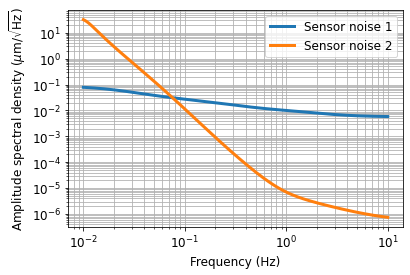

In [1]:
# Load and plot the noise models here.
import numpy as np
import matplotlib.pyplot as plt

import kontrol


f = np.logspace(-2, 1, 1024)
noise1 = kontrol.load_transfer_function("noise_lvdt.pkl")
noise2 = kontrol.load_transfer_function("noise_geophone.pkl")

plt.rcParams["font.size"] = 12
plt.figure(figsize=(6, 4))
plt.loglog(f, abs(noise1(1j*2*np.pi*f)), lw=3, label="Sensor noise 1")
plt.loglog(f, abs(noise2(1j*2*np.pi*f)), lw=3, label="Sensor noise 2")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel(r"Amplitude spectral density ($\mu \rm{m}/\sqrt{\rm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
plt.show()

In [2]:
# Make complementary filters here

# Read the paper for details for why these weights are chosen
weight1 = 1/noise2
weight2 = 1/noise1

comp = kontrol.ComplementaryFilter(noise1, noise2, weight1, weight2, f=f)

# Alternatively, set the attributes directly
# comp = kontrol.ComplementaryFilter()
# comp.noise1 = noise1
# comp.noise2 = noise2
# comp.weight1 = 1/noise2
# comp.weight2 = 1/noise1

_, _ = comp.hinfsynthesis()

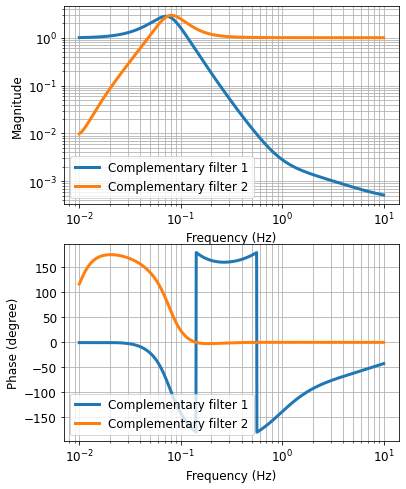

In [3]:
# Plot the filters here
plt.figure(figsize=(6, 8))
plt.subplot(211)
plt.loglog(f, abs(comp.filter1(1j*2*np.pi*f)), lw=3, label="Complementary filter 1")
plt.loglog(f, abs(comp.filter2(1j*2*np.pi*f)), lw=3, label="Complementary filter 2")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")
plt.xlabel("Frequency (Hz)")

plt.subplot(212)
plt.semilogx(f, 180/np.pi*np.angle(comp.filter1(1j*2*np.pi*f)), lw=3, label="Complementary filter 1")
plt.semilogx(f, 180/np.pi*np.angle(comp.filter2(1j*2*np.pi*f)), lw=3, label="Complementary filter 2")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Phase (degree)")
plt.xlabel("Frequency (Hz)")
plt.show()

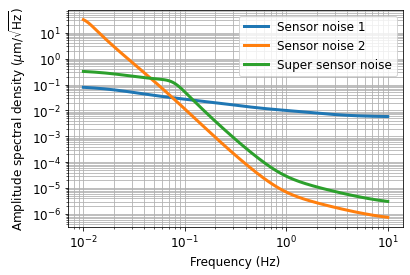

In [4]:
# Plot the predicted super sensor noise here
plt.figure(figsize=(6, 4))
plt.loglog(f, abs(noise1(1j*2*np.pi*f)), lw=3, label="Sensor noise 1")
plt.loglog(f, abs(noise2(1j*2*np.pi*f)), lw=3, label="Sensor noise 2")
plt.loglog(f, comp.noise_super(), lw=3, label="Super sensor noise")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel(r"Amplitude spectral density ($\mu \rm{m}/\sqrt{\rm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
plt.show()

In [6]:
# Output to Foton format
print("Filter 1:\n", comp.filter1.foton(root_location="n"))
print("")
print("Filter 2:\n", comp.filter2.foton(root_location="n"))

Filter 1:
 zpk([0.018186+i*0.011488;0.018186+i*-0.011488;0.048464+i*0.049906;0.048464+i*-0.049906;0.244541;0.343148+i*0.100487;0.343148+i*-0.100487;0.660487+i*0.655936;0.660487+i*-0.655936;1.53144;2.75745;9.48737;1.219e+20],[0.0185509;0.024324+i*0.073156;0.024324+i*-0.073156;0.063128+i*0.054238;0.063128+i*-0.054238;0.086811+i*0.027231;0.086811+i*-0.027231;0.0941082;0.460347;0.460394;2.76016;2.76016;2.71844e+07],0.966407,"n")

Filter 2:
 zpk([0.00560866;0.002725+i*0.009636;0.002725+i*-0.009636;0.0617431;0.0621602;0.133397;0.095793+i*0.104738;0.095793+i*-0.104738;0.4589;0.460372;2.75933;2.76016;2.7174e+07],[0.0185509;0.024324+i*0.073156;0.024324+i*-0.073156;0.063128+i*0.054238;0.063128+i*-0.054238;0.086811+i*0.027231;0.086811+i*-0.027231;0.0941082;0.460347;0.460394;2.76016;2.76016;2.71844e+07],0.0097132,"n")
